In [1]:
import pandas as pd
from scipy import stats
from statsmodels.stats.multitest import multipletests
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../experiment_01')
import random
from statsmodels.stats.multitest import multipletests

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
def make_bar_plots_gibbs(model_result_dict_3, model_result_dict_4, title):
    # Visualize results as bar charts with 2 bars per key (one for each experiment) and each bar being the correlation coefficient
    plt.figure(figsize=(12, 6))
    plt.title(title)
    plt.xlabel("Image Schema")
    plt.ylabel("Spearman Correlation Coefficient")
    # set y axis to 0.0 to 1.0
    plt.ylim(0.0, 1.0)
    # set y ticks to 0.0, 0.2, 0.4, ..., 1.0
    plt.yticks(np.arange(0.0, 1.1, 0.2))
    for key in DEFINITIONS:
        # the bars of the two experiments are next to each other
        plt.bar(key, stats.spearmanr(model_result_dict_3[key], exp_3_df[key])[0], width=0.4, color='orange')
        # move the bar to the right
        plt.bar(key, stats.spearmanr(model_result_dict_4[key], exp_4_df[key])[0], width=0.4, align='edge', color='blue')
    plt.legend(["Experiment 3", "Experiment 4"])
    plt.grid(axis='y')
    plt.show()

def make_bar_plots_beitel(model_result_dict_2, title):
    # Visualize results as bar charts with 2 bars per key (one for each experiment) and each bar being the correlation coefficient
    plt.figure(figsize=(12, 4))
    plt.title(title)
    plt.xlabel("Image Schema")
    plt.ylabel("Spearman Correlation Coefficient")
    # set y axis to 0.0 to 1.0
    plt.ylim(0.0, 1.0)
    # set y ticks to 0.0, 0.2, 0.4, ..., 1.0
    plt.yticks(np.arange(0.0, 1.1, 0.2))
    for key in DEFINITIONS_2:
        # the bars of the two experiments are next to each other
        plt.bar(key, stats.spearmanr(model_result_dict_2[key], exp_2_df[key])[0], width=0.4, color='red')
        # move the bar to the right
    plt.legend(["Experiment 2"])
    plt.grid(axis='y')
    plt.show()

def make_bar_plots_all(model_result_dict_2, model_result_dict_3, model_result_dict_4, title):
    # exp2 has different keys than exp3 and exp4
    # Visualize results as bar charts with 3 bars per xtick, the x labels being the image schemas and the bars being the correlation coefficient
    plt.figure(figsize=(16, 5))
    plt.title(title)
    plt.xlabel("Image Schema")
    plt.ylabel("Spearman Correlation Coefficient")
    # set y axis to 0.0 to 1.0
    plt.ylim(0.0, 1.0)
    # set y ticks to 0.0, 0.2, 0.4, ..., 1.0
    plt.yticks(np.arange(0.0, 1.1, 0.2))
    for i, key in enumerate(DEFINITIONS_2):
        # the bars of the two experiments are next to each other
        plt.bar(i-0.25, stats.spearmanr(model_result_dict_2[key], exp_2_df[key])[0], width=0.25, color='red')
    for i, key in enumerate(DEFINITIONS):
        # move the bar to the right
        plt.bar(i, stats.spearmanr(model_result_dict_3[key], exp_3_df[key])[0], width=0.25, color='orange')
        # move the bar to the right
        plt.bar(i+0.25, stats.spearmanr(model_result_dict_4[key], exp_4_df[key])[0], width=0.25, color='blue')
    # change x labels to image schema names
    labels = []
    for key in DEFINITIONS_2:
        labels.append(key)
    for j, key in enumerate(DEFINITIONS):
        labels[j]+= "/" + key
    plt.xticks(np.arange(len(labels)), labels)
    # add grid
    plt.grid(axis='y')


def make_scatter_plots_beitel(model_result_dict_2, title, x_label):
    # plot side by side, 5 plots
    fig, axs = plt.subplots(1, 5, figsize=(20, 3))
    fig.suptitle(title)
    plt.tight_layout()
    # add space between title and plots
    #fig.subplots_adjust(top=0.2)
    for i, key in enumerate(DEFINITIONS_2):
        # add scatter plot
        axs[i].scatter(model_result_dict_2[key], exp_2_df[key], color='red')
        axs[i].set_title(key)
        # Beitel subscript(on) as label
        if i==0: axs[i].set_ylabel("Human Rating ($Beitel_{on}$)")
        axs[i].set_xlabel(x_label)
        # set x and y limits to 0 to 7.2
        axs[i].set_xlim(0.7, 7.2)
        axs[i].set_ylim(0.7, 7.2)
        # set x and y ticks to 0, 1, 2, ..., 7
        axs[i].set_xticks(np.arange(1, 8, 1))
        axs[i].set_yticks(np.arange(1, 8, 1))
        # add correlation coefficient to each plot
        axs[i].text(0.05, 0.95, "r = " + str(round(stats.spearmanr(model_result_dict_2[key], exp_2_df[key])[0], 2)), transform=axs[i].transAxes, fontsize=12, verticalalignment='top')
    # save as png
    title = "Exp2_"+title[10:].replace(" ","").replace("-","_")
    plt.savefig("figures/Exp2/"+title+".png")
    

def make_scatter_plots_gibbs(model_result_dict_3, model_result_dict_4, title, x_label):
    # plot side by side, 5 plots
    fig, axs = plt.subplots(2, 5, figsize=(20, 6))
    fig.suptitle(title)
    for i, key in enumerate(DEFINITIONS):
        axs[0, i].scatter(model_result_dict_3[key], exp_3_df[key], color='orange')
        axs[0, i].set_title(key)
        if i==0: axs[0, i].set_ylabel("Human Rating ($Gibbs_{stand}$)")
        axs[1, i].scatter(model_result_dict_4[key], exp_4_df[key], color='blue')
        axs[1, i].set_xlabel(x_label)
        if i ==0: axs[1, i].set_ylabel("Human Rating ($Gibbs_{syn}$)")
        # set x and y limits to 0 to 7.2
        axs[0, i].set_xlim(0.7, 7.2)
        axs[0, i].set_ylim(0.7, 7.2)
        axs[1, i].set_xlim(0.7, 7.2)
        axs[1, i].set_ylim(0.7, 7.2)
        # set x and y ticks to 0, 1, 2, ..., 7
        axs[0, i].set_xticks(np.arange(1, 8, 1))
        axs[0, i].set_yticks(np.arange(1, 8, 1))
        axs[1, i].set_xticks(np.arange(1, 8, 1))
        axs[1, i].set_yticks(np.arange(1, 8, 1))
        # add correlation coefficient to each plot
        axs[0, i].text(0.05, 0.95, "r = " + str(round(stats.spearmanr(model_result_dict_3[key], exp_3_df[key])[0], 2)), transform=axs[0, i].transAxes, fontsize=12, verticalalignment='top')
        axs[1, i].text(0.05, 0.95, "r = " + str(round(stats.spearmanr(model_result_dict_4[key], exp_4_df[key])[0], 2)), transform=axs[1, i].transAxes, fontsize=12, verticalalignment='top')
    title = "Exp1_"+title[10:].replace(" ","").replace("-","_")
    plt.savefig("figures/Exp1/"+title+".png")

def print_correlations(completions_clean, exp_df, correlation_type, name=""):
    all_p_values = []
    all_r_values = []
    if correlation_type == "spearman":
        print("Spearman correlations per IS:")
        for k in completions_clean:
            all_r_values.append(stats.spearmanr(completions_clean[k], exp_df[k])[0])
            all_p_values.append(stats.spearmanr(completions_clean[k], exp_df[k])[1])
    elif correlation_type == "pearson":
        print("Pearson correlations per IS:")
        for k in completions_clean:
            all_r_values.append(stats.pearsonr(completions_clean[k], exp_df[k])[0])
            all_p_values.append(stats.pearsonr(completions_clean[k], exp_df[k])[1])
    for i,k in enumerate(completions_clean):
        print(k[:12], "\tp-value:", round(all_p_values[i],3), "\tcorrelation:", round(all_r_values[i],3))
    # print mean correlation
    print("Mean correlation:", round(np.mean(all_r_values),3))


def add_p_values_to_list(completions_clean, exp_df, correlation_type, all_p_values, all_r_values, labels, name, ignore_nan):
    if correlation_type == "spearman":
        for k in completions_clean:
            r, p = stats.spearmanr(completions_clean[k], exp_df[k])
            # check for nan
            if np.isnan(p) and not ignore_nan:
                p = 1.0
                all_r_values.append(r)
                all_p_values.append(p)
                labels.append(name+"_"+k[:12])
            else:
                all_r_values.append(r)
                all_p_values.append(p)
                labels.append(name+"_"+k[:12])
    elif correlation_type == "pearson":
        for k in completions_clean:
            r, p = stats.pearsonr(completions_clean[k], exp_df[k])
            # check for nan
            if np.isnan(p) and not ignore_nan:
                p = 1.0
                all_r_values.append(r)
                all_p_values.append(p)
                labels.append(name+"_"+k[:12])
            else:
                all_r_values.append(r)
                all_p_values.append(p)
                labels.append(name+"_"+k[:12])
                
    return all_p_values, all_r_values, labels            
    
    

def get_mean_absolute_error(completions, exp_df):
    print("The mean absolute error for each image schema is: ")
    errs = []
    for key in completions:
        print(key, mean_absolute_error(completions[key], exp_df[key]))
        errs.append(mean_absolute_error(completions[key], exp_df[key]))
    print("The mean absolute error for all image schemas is: ", np.mean(errs))

# Load Data

In [3]:
exp_2_df = pd.read_csv('../../data/Beitel_Exp2.csv', sep=';')   # = Beitel experiment with preposition "on"
exp_3_df = pd.read_csv('../../data/Gibbs_Exp3.csv', sep=';')    # = Gibbs experiment with verb "to stand"
exp_3_df = exp_3_df.dropna()
exp_4_df = pd.read_csv('../../data/Gibbs_Exp4.csv', sep=';')    # = Gibbs experiment with synonyms of "to stand"
STIMULI_EXP2 = exp_2_df['Stimulus'].values
STIMULI_EXP3 = exp_3_df['Stimulus'].values
STIMULI_EXP4 = exp_4_df['Stimulus'].values
print(len(STIMULI_EXP2))
print(len(STIMULI_EXP3))
print(len(STIMULI_EXP4))

DEFINITIONS = {
    "VERTICALITY": "Consider the notion of VERTICALITY. Verticality refers to the sense of an extension along an up—down orientation.",
    "BALANCE": "Consider the notion of BALANCE. Balance refers to your sense of symmetry or stability relative to some point within your body.",
    "CENTER-PERIPHERY": "Consider the notion of CENTER-PERIPHERY. Center-periphery refers to the experience of some objects or events as central while surrounding objects and events are peripheral or to the outside.",
    "LINKAGE": "Consider the notion of LINKAGE. Linkage refers to the perception of a connection between objects or events.",
    "RESISTANCE": "Consider the notion of RESISTANCE. Resistance refers to the experience of your body opposing some external force."
}

DEFINITIONS_2_INTRO='In the case of the use of "on" in "the book is on the desk":'
DEFINITIONS_2 = {
    "SUPPORT": "the SUPPORT relation refers to the desk supporting the book.",
    "PRESSURE": "the PRESSURE relation refers to the book exerting some pressure on the desk.",
    "CONSTRAINT": "the CONSTRAINT relation refers to the desk constraining the possible motions of the book.",
    "COVERING": "the COVERING relation refers to the book concealing the part of the desk that is under the book.",     
    "VISIBILITY": "the VISIBILITY relation refers to the book being visible on the desk."
}

37
32
32


In [4]:
# load model completion data

# davinci003
davinci003_exp2_df = pd.read_csv('lm_generations/df_single_prompt_exp2_davinci003_2023-10-19.csv')
davinci003_exp2_dict = {key: davinci003_exp2_df[key].values for key in ["SUPPORT", "PRESSURE", "CONSTRAINT", "COVERING", "VISIBILITY"]}

davinci003_exp3_df = pd.read_csv('lm_generations/df_single_prompt_exp3_davinci003_2023-10-18.csv')
davinci003_exp3_dict = {key: davinci003_exp3_df[key].values for key in ["VERTICALITY", "BALANCE", "CENTER-PERIPHERY", "LINKAGE", "RESISTANCE"]}

davinci003_exp4_df = pd.read_csv('lm_generations/df_single_prompt_exp4_davinci003_2023-10-18.csv')
davinci003_exp4_dict = {key: davinci003_exp4_df[key].values for key in ["VERTICALITY", "BALANCE", "CENTER-PERIPHERY", "LINKAGE", "RESISTANCE"]}

# davinci003 with logprobs
davinci003_exp2_df_logprobs = pd.read_csv('lm_generations/df_single_prompt_exp2_davinci003_logprobs_2023-10-19.csv')
davinci003_exp2_dict_logprobs = {key: davinci003_exp2_df_logprobs[key].values for key in ["SUPPORT", "PRESSURE", "CONSTRAINT", "COVERING", "VISIBILITY"]}

davinci003_exp3_df_logprobs = pd.read_csv('lm_generations/df_single_prompt_exp3_davinci003_logprobs_2023-10-18.csv')
davinci003_exp3_dict_logprobs = {key: davinci003_exp3_df_logprobs[key].values for key in ["VERTICALITY", "BALANCE", "CENTER-PERIPHERY", "LINKAGE", "RESISTANCE"]}

davinci003_exp4_df_logprobs = pd.read_csv('lm_generations/df_single_prompt_exp4_davinci003_logprobs_2023-10-18.csv')
davinci003_exp4_dict_logprobs = {key: davinci003_exp4_df_logprobs[key].values for key in ["VERTICALITY", "BALANCE", "CENTER-PERIPHERY", "LINKAGE", "RESISTANCE"]}

# davinci002
davinci002_exp2_df = pd.read_csv('lm_generations/df_single_prompt_exp2_davinci002_2023-11-04.csv')
davinci002_exp2_dict = {key: davinci002_exp2_df[key].values for key in ["SUPPORT", "PRESSURE", "CONSTRAINT", "COVERING", "VISIBILITY"]}

davinci002_exp3_df = pd.read_csv('lm_generations/df_single_prompt_exp3_davinci-002_2023-11-04.csv')
davinci002_exp3_dict = {key: davinci002_exp3_df[key].values for key in ["VERTICALITY", "BALANCE", "CENTER-PERIPHERY", "LINKAGE", "RESISTANCE"]}

davinci002_exp4_df = pd.read_csv('lm_generations/df_single_prompt_exp4_davinci-002_2023-11-04.csv', sep=';')
davinci002_exp4_dict = {key: davinci002_exp4_df[key].values for key in ["VERTICALITY", "BALANCE", "CENTER-PERIPHERY", "LINKAGE", "RESISTANCE"]}

# davinci 002 with logprobs

davinci002_exp3_df_logprobs = pd.read_csv('lm_generations/df_single_prompt_exp3_davinci-002_logprobs_2023-11-04.csv')
davinci002_exp3_dict_logprobs = {key: davinci002_exp3_df_logprobs[key].values for key in ["VERTICALITY", "BALANCE", "CENTER-PERIPHERY", "LINKAGE", "RESISTANCE"]}

# gpt-4

gpt4_exp2_df = pd.read_csv('lm_generations/df_single_prompt_exp2_gpt-4_2023-11-04.csv')
gpt4_exp2_dict = {key: gpt4_exp2_df[key].values for key in ["SUPPORT", "PRESSURE", "CONSTRAINT", "COVERING", "VISIBILITY"]}

gpt4_exp3_df = pd.read_csv('lm_generations/df_single_prompt_exp3_gpt-4_2023-11-04.csv')
gpt4_exp3_dict = {key: gpt4_exp3_df[key].values for key in ["VERTICALITY", "BALANCE", "CENTER-PERIPHERY", "LINKAGE", "RESISTANCE"]}

gpt4_exp4_df = pd.read_csv('lm_generations/df_single_prompt_exp4_gpt-4_2023-11-04.csv')
gpt4_exp4_dict = {key: gpt4_exp4_df[key].values for key in ["VERTICALITY", "BALANCE", "CENTER-PERIPHERY", "LINKAGE", "RESISTANCE"]}

# llama7b
llama7b_exp2_df = pd.read_csv('lm_generations/df_single_prompt_exp2_llama7-chat_2023-11-19.csv')
llama7b_exp2_dict = {key: llama7b_exp2_df[key].values for key in ["SUPPORT", "PRESSURE", "CONSTRAINT", "COVERING", "VISIBILITY"]}

llama7b_exp3_df = pd.read_csv('lm_generations/df_single_prompt_exp3_llama7-chat_2023-11-19.csv')
llama7b_exp3_dict = {key: llama7b_exp3_df[key].values for key in ["VERTICALITY", "BALANCE", "CENTER-PERIPHERY", "LINKAGE", "RESISTANCE"]}

llama7b_exp4_df = pd.read_csv('lm_generations/df_single_prompt_exp4_llama7-chat_2023-11-19.csv')
llama7b_exp4_dict = {key: llama7b_exp4_df[key].values for key in ["VERTICALITY", "BALANCE", "CENTER-PERIPHERY", "LINKAGE", "RESISTANCE"]}

# llama 13b
llama13b_exp2_df = pd.read_csv('lm_generations/df_single_prompt_exp2_llama13-chat_2023-11-19.csv')
llama13b_exp2_dict = {key: llama13b_exp2_df[key].values for key in ["SUPPORT", "PRESSURE", "CONSTRAINT", "COVERING", "VISIBILITY"]}

llama13b_exp3_df = pd.read_csv('lm_generations/df_single_prompt_exp3_llama13-chat_2023-11-19.csv')
llama13b_exp3_dict = {key: llama13b_exp3_df[key].values for key in ["VERTICALITY", "BALANCE", "CENTER-PERIPHERY", "LINKAGE", "RESISTANCE"]}

llama13b_exp4_df = pd.read_csv('lm_generations/df_single_prompt_exp4_llama13-chat_2023-11-19.csv')
llama13b_exp4_dict = {key: llama13b_exp4_df[key].values for key in ["VERTICALITY", "BALANCE", "CENTER-PERIPHERY", "LINKAGE", "RESISTANCE"]}

# llama 70b
llama70b_exp2_df = pd.read_csv('lm_generations/df_single_prompt_exp2_llama70-chat_2023-11-23.csv')
llama70b_exp2_dict = {key: llama70b_exp2_df[key].values for key in ["SUPPORT", "PRESSURE", "CONSTRAINT", "COVERING", "VISIBILITY"]}

llama70b_exp3_df = pd.read_csv('lm_generations/df_single_prompt_exp3_llama70-chat_2023-11-23.csv')
llama70b_exp3_dict = {key: llama70b_exp3_df[key].values for key in ["VERTICALITY", "BALANCE", "CENTER-PERIPHERY", "LINKAGE", "RESISTANCE"]}

llama70b_exp4_df = pd.read_csv('lm_generations/df_single_prompt_exp4_llama70-chat_2023-11-23.csv')
llama70b_exp4_dict = {key: llama70b_exp4_df[key].values for key in ["VERTICALITY", "BALANCE", "CENTER-PERIPHERY", "LINKAGE", "RESISTANCE"]}

# Analyse Data

## Logprob vs Max

Is taking the average based on logprobs better than simply taking the single most likely response (=score)?

In [5]:
# how big is the difference when using logprob averaging?
print("\nExperiment 2 — Beitel:")
get_mean_absolute_error(davinci003_exp2_dict, davinci003_exp2_dict_logprobs)
print("\nExperiment 3 — Gibbs Stand:")
get_mean_absolute_error(davinci003_exp3_dict, davinci003_exp3_dict_logprobs)
print("\nExperiment 4 — Gibbs Syonnym:")
get_mean_absolute_error(davinci003_exp4_dict, davinci003_exp4_dict_logprobs)


Experiment 2 — Beitel:
The mean absolute error for each image schema is: 
SUPPORT 0.5474568620338988
PRESSURE 0.4206053416524155
CONSTRAINT 0.3769131011273762
COVERING 0.23106340288452404
VISIBILITY 0.44818815163176273
The mean absolute error for all image schemas is:  0.4048453718659955

Experiment 3 — Gibbs Stand:
The mean absolute error for each image schema is: 
VERTICALITY 0.25352565197994803
BALANCE 0.3375683414003554
CENTER-PERIPHERY 0.5833259490262679
LINKAGE 0.3445448829863865
RESISTANCE 0.3778412002022125
The mean absolute error for all image schemas is:  0.3793612051190341

Experiment 4 — Gibbs Syonnym:
The mean absolute error for each image schema is: 
VERTICALITY 0.3098702671255624
BALANCE 0.3721755113682907
CENTER-PERIPHERY 0.5968953036838861
LINKAGE 0.2982509853946872
RESISTANCE 0.3250758973405232
The mean absolute error for all image schemas is:  0.38045359298258996


## Correlations

all with corrections

In [6]:
all_p_values_beitel = []
all_r_values_beitel = []
p_value_labels_beitel = []
all_p_values_gibbs = []
all_r_values_gibbs = []
p_value_labels_gibbs = []
ignore_nan = False



# beitel (exp2)
add_p_values_to_list(completions_clean=davinci002_exp2_dict, exp_df=exp_2_df, correlation_type="spearman", all_p_values=all_p_values_beitel, all_r_values=all_r_values_beitel, labels=p_value_labels_beitel, name="beitel_davinci002", ignore_nan=ignore_nan)
add_p_values_to_list(completions_clean=davinci003_exp2_dict, exp_df=exp_2_df, correlation_type="spearman", all_p_values=all_p_values_beitel, all_r_values=all_r_values_beitel, labels=p_value_labels_beitel, name="beitel_davinci003", ignore_nan=ignore_nan)
add_p_values_to_list(completions_clean=gpt4_exp2_dict, exp_df=exp_2_df, correlation_type="spearman", all_p_values=all_p_values_beitel, all_r_values=all_r_values_beitel, labels=p_value_labels_beitel, name="beitel_gpt4", ignore_nan=ignore_nan)
#add_p_values_to_list(completions_clean=llama7b_exp2_dict, exp_df=exp_2_df, correlation_type="spearman", all_p_values=all_p_values_beitel, all_r_values=all_r_values_beitel, labels=p_value_labels_beitel, name="beitel_llama7b", ignore_nan=ignore_nan)
add_p_values_to_list(completions_clean=llama13b_exp2_dict, exp_df=exp_2_df, correlation_type="spearman", all_p_values=all_p_values_beitel, all_r_values=all_r_values_beitel, labels=p_value_labels_beitel, name="beitel_llama13b", ignore_nan=ignore_nan)
add_p_values_to_list(completions_clean=llama70b_exp2_dict, exp_df=exp_2_df, correlation_type="spearman", all_p_values=all_p_values_beitel, all_r_values=all_r_values_beitel, labels=p_value_labels_beitel, name="beitel_llama70b", ignore_nan=ignore_nan)

# fdr benjamini hochberg
significant_results = 0
all_p_values_beitel_corrected = multipletests(all_p_values_beitel, alpha=0.05, method='fdr_bh')
for i,k in enumerate(p_value_labels_beitel):
    if all_p_values_beitel_corrected[1][i] < 0.05:
        print(k, "\tp-value:", round(all_p_values_beitel[i],3), "\tcorrected p-value:", round(all_p_values_beitel_corrected[1][i],3), "\tcorrelation:", round(all_r_values_beitel[i],3), "***")
        significant_results += 1
    else: 
        print(k, "\tp-value:", round(all_p_values_beitel[i],3), "\tcorrected p-value:", round(all_p_values_beitel_corrected[1][i],3), "\tcorrelation:", round(all_r_values_beitel[i],3))
print("Significant results: ", significant_results)
print("\n\n")

# gibbs (exp3 and exp4)
add_p_values_to_list(completions_clean=davinci002_exp3_dict, exp_df=exp_3_df, correlation_type="spearman", all_p_values=all_p_values_gibbs, all_r_values=all_r_values_gibbs, labels=p_value_labels_gibbs, name="gibbs3_davinci002", ignore_nan=ignore_nan)
add_p_values_to_list(completions_clean=davinci003_exp3_dict, exp_df=exp_3_df, correlation_type="spearman", all_p_values=all_p_values_gibbs, all_r_values=all_r_values_gibbs, labels=p_value_labels_gibbs, name="gibbs3_davinci003", ignore_nan=ignore_nan)
add_p_values_to_list(completions_clean=gpt4_exp3_dict, exp_df=exp_3_df, correlation_type="spearman", all_p_values=all_p_values_gibbs, all_r_values=all_r_values_gibbs, labels=p_value_labels_gibbs, name="gibbs3_gpt4", ignore_nan=ignore_nan)
#add_p_values_to_list(completions_clean=llama7b_exp3_dict, exp_df=exp_3_df, correlation_type="spearman", all_p_values=all_p_values_gibbs, all_r_values=all_r_values_gibbs, labels=p_value_labels_gibbs, name="gibbs3_llama7b", ignore_nan=ignore_nan)
add_p_values_to_list(completions_clean=llama13b_exp3_dict, exp_df=exp_3_df, correlation_type="spearman", all_p_values=all_p_values_gibbs, all_r_values=all_r_values_gibbs, labels=p_value_labels_gibbs, name="gibbs3_llama13b", ignore_nan=ignore_nan)
add_p_values_to_list(completions_clean=llama70b_exp3_dict, exp_df=exp_3_df, correlation_type="spearman", all_p_values=all_p_values_gibbs, all_r_values=all_r_values_gibbs, labels=p_value_labels_gibbs, name="gibbs3_llama70b", ignore_nan=ignore_nan)
add_p_values_to_list(completions_clean=davinci002_exp4_dict, exp_df=exp_4_df, correlation_type="spearman", all_p_values=all_p_values_gibbs, all_r_values=all_r_values_gibbs, labels=p_value_labels_gibbs, name="gibbs4_davinci002", ignore_nan=ignore_nan)
add_p_values_to_list(completions_clean=davinci003_exp4_dict, exp_df=exp_4_df, correlation_type="spearman", all_p_values=all_p_values_gibbs, all_r_values=all_r_values_gibbs, labels=p_value_labels_gibbs, name="gibbs4_davinci003", ignore_nan=ignore_nan)
add_p_values_to_list(completions_clean=gpt4_exp4_dict, exp_df=exp_4_df, correlation_type="spearman", all_p_values=all_p_values_gibbs, all_r_values=all_r_values_gibbs, labels=p_value_labels_gibbs, name="gibbs4_gpt4", ignore_nan=ignore_nan)
#add_p_values_to_list(completions_clean=llama7b_exp4_dict, exp_df=exp_4_df, correlation_type="spearman", all_p_values=all_p_values_gibbs, all_r_values=all_r_values_gibbs, labels=p_value_labels_gibbs, name="gibbs4_llama7b", ignore_nan=ignore_nan)
add_p_values_to_list(completions_clean=llama13b_exp4_dict, exp_df=exp_4_df, correlation_type="spearman", all_p_values=all_p_values_gibbs, all_r_values=all_r_values_gibbs, labels=p_value_labels_gibbs, name="gibbs4_llama13b", ignore_nan=ignore_nan)
add_p_values_to_list(completions_clean=llama70b_exp4_dict, exp_df=exp_4_df, correlation_type="spearman", all_p_values=all_p_values_gibbs, all_r_values=all_r_values_gibbs, labels=p_value_labels_gibbs, name="gibbs4_llama70b", ignore_nan=ignore_nan)

significant_results = 0
# fdr benjamini hochberg
all_p_values_gibbs_corrected = multipletests(all_p_values_gibbs, alpha=0.05, method='fdr_bh')
for i,k in enumerate(p_value_labels_gibbs):
    if all_p_values_gibbs_corrected[1][i] < 0.05:
        print(k, "\tp-value:", round(all_p_values_gibbs[i],3), "\tcorrected p-value:", round(all_p_values_gibbs_corrected[1][i],3), "\tcorrelation:", round(all_r_values_gibbs[i],3), "***")
        significant_results += 1
    else: 
        print(k, "\tp-value:", round(all_p_values_gibbs[i],3), "\tcorrected p-value:", round(all_p_values_gibbs_corrected[1][i],3), "\tcorrelation:", round(all_r_values_gibbs[i],3))
print("Significant results: ", significant_results)




beitel_davinci002_SUPPORT 	p-value: 1.0 	corrected p-value: 1.0 	correlation: nan
beitel_davinci002_PRESSURE 	p-value: 1.0 	corrected p-value: 1.0 	correlation: nan
beitel_davinci002_CONSTRAINT 	p-value: 1.0 	corrected p-value: 1.0 	correlation: nan
beitel_davinci002_COVERING 	p-value: 1.0 	corrected p-value: 1.0 	correlation: nan
beitel_davinci002_VISIBILITY 	p-value: 1.0 	corrected p-value: 1.0 	correlation: nan
beitel_davinci003_SUPPORT 	p-value: 0.003 	corrected p-value: 0.007 	correlation: 0.482 ***
beitel_davinci003_PRESSURE 	p-value: 0.0 	corrected p-value: 0.0 	correlation: 0.785 ***
beitel_davinci003_CONSTRAINT 	p-value: 0.0 	corrected p-value: 0.0 	correlation: 0.597 ***
beitel_davinci003_COVERING 	p-value: 0.004 	corrected p-value: 0.01 	correlation: 0.458 ***
beitel_davinci003_VISIBILITY 	p-value: 0.0 	corrected p-value: 0.0 	correlation: 0.686 ***
beitel_gpt4_SUPPORT 	p-value: 0.0 	corrected p-value: 0.0 	correlation: 0.62 ***
beitel_gpt4_PRESSURE 	p-value: 0.026 	correcte

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [7]:
# average performance
gibbs_stand = {"VERTICALITY": [], "BALANCE": [], "CENTER-PERIP": [], "LINKAGE": [], "RESISTANCE": []}
gibbs_synonym = {"VERTICALITY": [], "BALANCE": [], "CENTER-PERIP": [], "LINKAGE": [], "RESISTANCE": []}
beitel = {"SUPPORT": [], "PRESSURE": [], "CONSTRAINT": [], "COVERING": [], "VISIBILITY": []}

for label in p_value_labels_beitel:
    key = label.split("_")[2]
    # if not nan 
    if not np.isnan(all_r_values_beitel[p_value_labels_beitel.index(label)]):
        beitel[key].append(all_r_values_beitel[p_value_labels_beitel.index(label)])

for label in p_value_labels_gibbs:
    key = label.split("_")[2]
    # if not nan 
    if not np.isnan(all_r_values_gibbs[p_value_labels_gibbs.index(label)]):
        if label.split("_")[0] == "gibbs3":
            gibbs_stand[key].append(all_r_values_gibbs[p_value_labels_gibbs.index(label)])
        elif label.split("_")[0] == "gibbs4":
            gibbs_synonym[key].append(all_r_values_gibbs[p_value_labels_gibbs.index(label)])

# compute averages
for key in beitel:
    print(beitel[key])
    print(key, np.mean(beitel[key]))

print("\n")
for key in gibbs_stand:
    print(gibbs_stand[key])
    print(key, np.mean(gibbs_stand[key]))

print("\n")
for key in gibbs_synonym:
    print(gibbs_synonym[key])
    print(key, np.mean(gibbs_synonym[key]))

[0.48232973498328974, 0.6196629485015072, 0.19096318237992407, 0.3246160478129293]
SUPPORT 0.4043929784194126
[0.7852347857260793, 0.36671648536841395, 0.37291311766936075, 0.7223820531344902]
PRESSURE 0.561811610474586
[0.5974001489389732, 0.47346157326941807, 0.4928679257821511, 0.3658736705813484]
CONSTRAINT 0.48240082964297265
[0.45754815136116467, 0.6755210695683015, -0.15048837901879983, 0.4111783813419229]
COVERING 0.3484398058131473
[0.6863125330273422, 0.6187677984118244, 0.24197753057905494, 0.3824059061753021]
VISIBILITY 0.4823659420483809


[0.5312418401450295, 0.6936408508482671, 0.2561877635481939, 0.4132467067533994]
VERTICALITY 0.4735792903237225
[-0.046624606929812004, 0.3675016615804176, 0.49167773820721344, 0.26770852816054364, 0.379842946900441]
BALANCE 0.2920212535837607
[0.8193051957000557, 0.5635606869104952, 0.20204361545198746, 0.3582871819500093]
CENTER-PERIP 0.48579917000313694
[0.45788470109704293, 0.609425127938119, 0.2391997106286654, -0.05620794760645963]

with random data

In [8]:
# create random fake completions and compare the mean absolute error + the correlations
random_completions={}
for key in DEFINITIONS:
    random_completions[key]=[]
    for i in range(len(exp_3_df[key])):
        random_completions[key].append(random.randint(1, 7))

get_mean_absolute_error(random_completions, exp_3_df)
print_correlations(random_completions, exp_3_df, "spearman")


The mean absolute error for each image schema is: 
VERTICALITY 1.9240625
BALANCE 1.6875
CENTER-PERIPHERY 1.9846875000000002
LINKAGE 2.27375
RESISTANCE 1.7615625000000001
The mean absolute error for all image schemas is:  1.9263124999999999
Spearman correlations per IS:
VERTICALITY 	p-value: 0.662 	correlation: 0.08
BALANCE 	p-value: 0.44 	correlation: 0.141
CENTER-PERIP 	p-value: 0.144 	correlation: -0.264
LINKAGE 	p-value: 0.669 	correlation: -0.079
RESISTANCE 	p-value: 0.298 	correlation: 0.19
Mean correlation: 0.014


with davinci-002

In [9]:
# load llm ratings from pickle file
print("\nBeitel On")
print_correlations(davinci002_exp2_dict, exp_2_df, correlation_type="spearman")
print("\nGibbs Stand")
print_correlations(davinci002_exp3_dict, exp_3_df, correlation_type="spearman")
print("\nGibbs Synonym")
print_correlations(davinci002_exp4_dict, exp_4_df, correlation_type="spearman")

# does log prob lead to any reasonable results?
print("\nExperiment 3 with logprobs")
print_correlations(davinci002_exp3_dict_logprobs, exp_3_df, correlation_type="spearman")


Beitel On
Spearman correlations per IS:
SUPPORT 	p-value: nan 	correlation: nan
PRESSURE 	p-value: nan 	correlation: nan
CONSTRAINT 	p-value: nan 	correlation: nan
COVERING 	p-value: nan 	correlation: nan
VISIBILITY 	p-value: nan 	correlation: nan
Mean correlation: nan

Gibbs Stand
Spearman correlations per IS:
VERTICALITY 	p-value: nan 	correlation: nan
BALANCE 	p-value: 0.8 	correlation: -0.047
CENTER-PERIP 	p-value: nan 	correlation: nan
LINKAGE 	p-value: nan 	correlation: nan
RESISTANCE 	p-value: nan 	correlation: nan
Mean correlation: nan

Gibbs Synonym
Spearman correlations per IS:
VERTICALITY 	p-value: nan 	correlation: nan
BALANCE 	p-value: 0.34 	correlation: 0.174
CENTER-PERIP 	p-value: 0.374 	correlation: 0.163
LINKAGE 	p-value: nan 	correlation: nan
RESISTANCE 	p-value: nan 	correlation: nan
Mean correlation: nan

Experiment 3 with logprobs
Spearman correlations per IS:
VERTICALITY 	p-value: 0.562 	correlation: 0.107
BALANCE 	p-value: 0.272 	correlation: 0.2
CENTER-PERIP 	p

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


with davinci 003

In [10]:
# load llm ratings from pickle file
print("\nBeitel On")
print_correlations(davinci003_exp2_dict, exp_2_df, correlation_type="spearman")
print("\nGibbs Stand")
print_correlations(davinci003_exp3_dict, exp_3_df, correlation_type="spearman")
print("\nGibbs Synonym")
print_correlations(davinci003_exp4_dict, exp_4_df, correlation_type="spearman")


Beitel On
Spearman correlations per IS:
SUPPORT 	p-value: 0.003 	correlation: 0.482
PRESSURE 	p-value: 0.0 	correlation: 0.785
CONSTRAINT 	p-value: 0.0 	correlation: 0.597
COVERING 	p-value: 0.004 	correlation: 0.458
VISIBILITY 	p-value: 0.0 	correlation: 0.686
Mean correlation: 0.602

Gibbs Stand
Spearman correlations per IS:
VERTICALITY 	p-value: 0.002 	correlation: 0.531
BALANCE 	p-value: 0.039 	correlation: 0.368
CENTER-PERIP 	p-value: 0.0 	correlation: 0.819
LINKAGE 	p-value: 0.008 	correlation: 0.458
RESISTANCE 	p-value: 0.0 	correlation: 0.706
Mean correlation: 0.576

Gibbs Synonym
Spearman correlations per IS:
VERTICALITY 	p-value: 0.004 	correlation: 0.491
BALANCE 	p-value: 0.004 	correlation: 0.496
CENTER-PERIP 	p-value: 0.0 	correlation: 0.67
LINKAGE 	p-value: 0.0 	correlation: 0.608
RESISTANCE 	p-value: 0.0 	correlation: 0.614
Mean correlation: 0.576


gpt-4

In [11]:
# load llm ratings from pickle file
print("\nBeitel On")
print_correlations(gpt4_exp2_dict, exp_2_df, correlation_type="spearman")
print("\nGibbs Stand")
print_correlations(gpt4_exp3_dict, exp_3_df, correlation_type="spearman")
print("\nGibbs Synonym")
print_correlations(gpt4_exp4_dict, exp_4_df, correlation_type="spearman")


Beitel On
Spearman correlations per IS:
SUPPORT 	p-value: 0.0 	correlation: 0.62
PRESSURE 	p-value: 0.026 	correlation: 0.367
CONSTRAINT 	p-value: 0.003 	correlation: 0.473
COVERING 	p-value: 0.0 	correlation: 0.676
VISIBILITY 	p-value: 0.0 	correlation: 0.619
Mean correlation: 0.551

Gibbs Stand
Spearman correlations per IS:
VERTICALITY 	p-value: 0.0 	correlation: 0.694
BALANCE 	p-value: 0.004 	correlation: 0.492
CENTER-PERIP 	p-value: 0.001 	correlation: 0.564
LINKAGE 	p-value: 0.0 	correlation: 0.609
RESISTANCE 	p-value: 0.0 	correlation: 0.824
Mean correlation: 0.636

Gibbs Synonym
Spearman correlations per IS:
VERTICALITY 	p-value: 0.0 	correlation: 0.695
BALANCE 	p-value: 0.002 	correlation: 0.537
CENTER-PERIP 	p-value: 0.0 	correlation: 0.669
LINKAGE 	p-value: 0.178 	correlation: 0.244
RESISTANCE 	p-value: 0.0 	correlation: 0.771
Mean correlation: 0.583


Llama 7b

In [12]:
# load llm ratings from pickle file
print("\nBeitel On")
print_correlations(llama7b_exp2_dict, exp_2_df, correlation_type="spearman")
print("\nGibbs Stand")
print_correlations(llama7b_exp3_dict, exp_3_df, correlation_type="spearman")
print("\nGibbs Synonym")
print_correlations(llama7b_exp4_dict, exp_4_df, correlation_type="spearman")


Beitel On
Spearman correlations per IS:
SUPPORT 	p-value: nan 	correlation: nan
PRESSURE 	p-value: nan 	correlation: nan
CONSTRAINT 	p-value: 0.613 	correlation: -0.086
COVERING 	p-value: 0.456 	correlation: -0.126
VISIBILITY 	p-value: 0.974 	correlation: 0.006
Mean correlation: nan

Gibbs Stand
Spearman correlations per IS:
VERTICALITY 	p-value: 0.134 	correlation: 0.271
BALANCE 	p-value: 0.299 	correlation: 0.19
CENTER-PERIP 	p-value: 0.009 	correlation: 0.453
LINKAGE 	p-value: 0.006 	correlation: 0.478
RESISTANCE 	p-value: 0.282 	correlation: 0.196
Mean correlation: 0.317

Gibbs Synonym
Spearman correlations per IS:
VERTICALITY 	p-value: 0.085 	correlation: 0.309
BALANCE 	p-value: 0.968 	correlation: -0.007
CENTER-PERIP 	p-value: 0.041 	correlation: 0.362
LINKAGE 	p-value: 0.018 	correlation: 0.416
RESISTANCE 	p-value: 0.339 	correlation: -0.175
Mean correlation: 0.181


Llama 13b

In [13]:
# load llm ratings from pickle file
print("\nBeitel On")
print_correlations(llama13b_exp2_dict, exp_2_df, correlation_type="spearman")
print("\nGibbs Stand")
print_correlations(llama13b_exp3_dict, exp_3_df, correlation_type="spearman")
print("\nGibbs Synonym")
print_correlations(llama13b_exp4_dict, exp_4_df, correlation_type="spearman")


Beitel On
Spearman correlations per IS:
SUPPORT 	p-value: 0.258 	correlation: 0.191
PRESSURE 	p-value: 0.023 	correlation: 0.373
CONSTRAINT 	p-value: 0.002 	correlation: 0.493
COVERING 	p-value: 0.374 	correlation: -0.15
VISIBILITY 	p-value: 0.149 	correlation: 0.242
Mean correlation: 0.23

Gibbs Stand
Spearman correlations per IS:
VERTICALITY 	p-value: 0.157 	correlation: 0.256
BALANCE 	p-value: 0.139 	correlation: 0.268
CENTER-PERIP 	p-value: 0.267 	correlation: 0.202
LINKAGE 	p-value: 0.187 	correlation: 0.239
RESISTANCE 	p-value: 0.02 	correlation: 0.409
Mean correlation: 0.275

Gibbs Synonym
Spearman correlations per IS:
VERTICALITY 	p-value: 0.228 	correlation: 0.219
BALANCE 	p-value: 0.043 	correlation: 0.36
CENTER-PERIP 	p-value: 0.231 	correlation: 0.218
LINKAGE 	p-value: 0.0 	correlation: 0.614
RESISTANCE 	p-value: 0.097 	correlation: 0.298
Mean correlation: 0.342


Llama 70b

In [14]:
# load llm ratings from pickle file
print("\nBeitel On")
print_correlations(llama70b_exp2_dict, exp_2_df, correlation_type="spearman")
print("\nGibbs Stand")
print_correlations(llama70b_exp3_dict, exp_3_df, correlation_type="spearman")
print("\nGibbs Synonym")
print_correlations(llama70b_exp4_dict, exp_4_df, correlation_type="spearman")


Beitel On
Spearman correlations per IS:
SUPPORT 	p-value: 0.05 	correlation: 0.325
PRESSURE 	p-value: 0.0 	correlation: 0.722
CONSTRAINT 	p-value: 0.026 	correlation: 0.366
COVERING 	p-value: 0.011 	correlation: 0.411
VISIBILITY 	p-value: 0.02 	correlation: 0.382
Mean correlation: 0.441

Gibbs Stand
Spearman correlations per IS:
VERTICALITY 	p-value: 0.019 	correlation: 0.413
BALANCE 	p-value: 0.032 	correlation: 0.38
CENTER-PERIP 	p-value: 0.044 	correlation: 0.358
LINKAGE 	p-value: 0.76 	correlation: -0.056
RESISTANCE 	p-value: 0.006 	correlation: 0.478
Mean correlation: 0.315

Gibbs Synonym
Spearman correlations per IS:
VERTICALITY 	p-value: 0.001 	correlation: 0.567
BALANCE 	p-value: 0.003 	correlation: 0.503
CENTER-PERIP 	p-value: 0.072 	correlation: 0.322
LINKAGE 	p-value: 0.079 	correlation: 0.315
RESISTANCE 	p-value: 0.001 	correlation: 0.543
Mean correlation: 0.45


## Plots

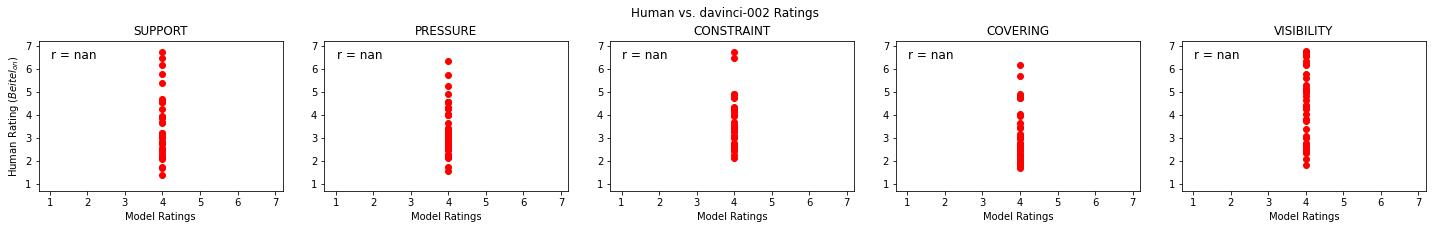

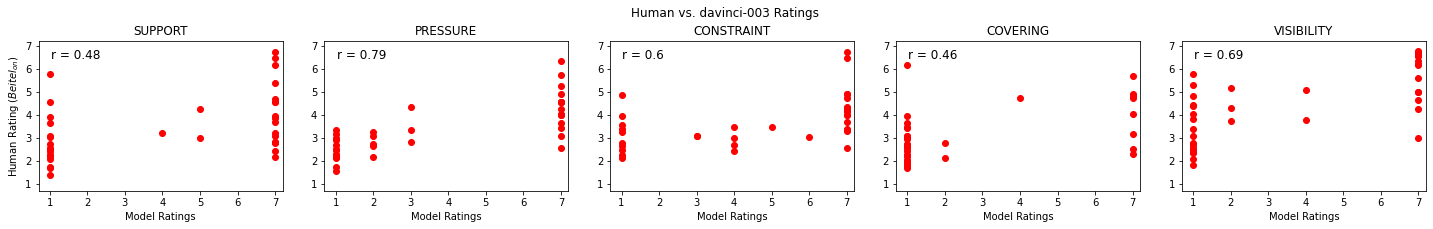

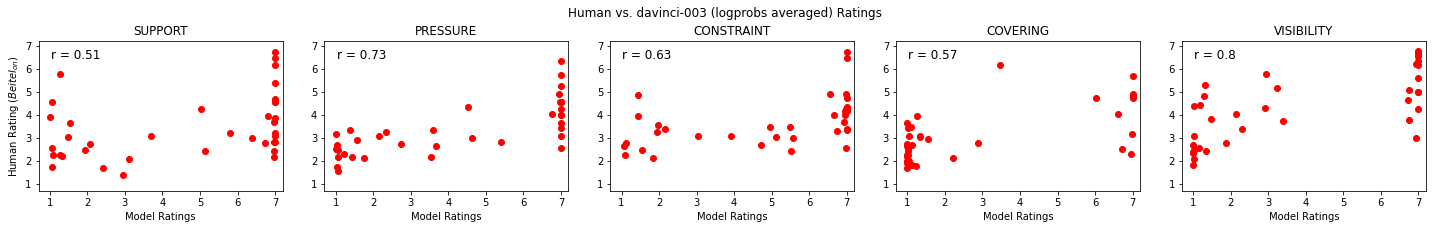

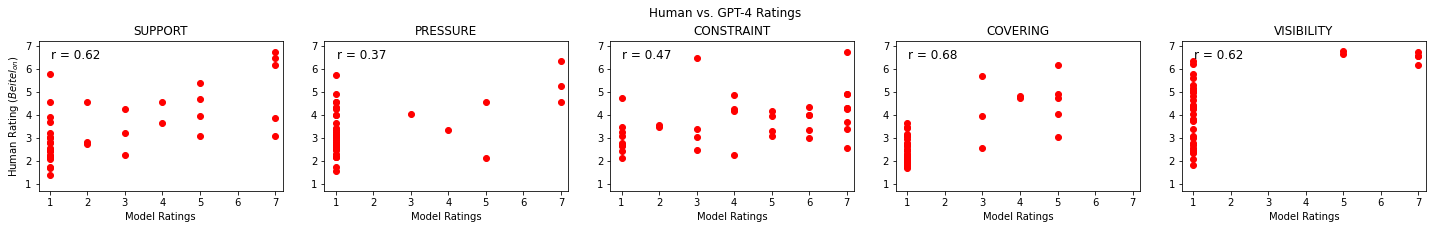

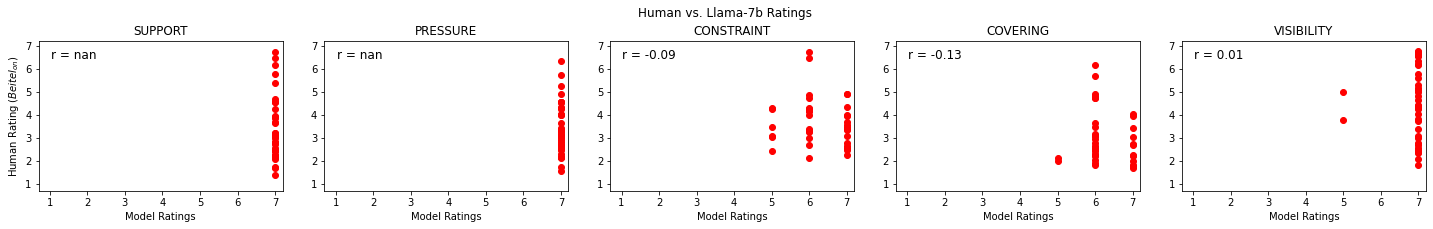

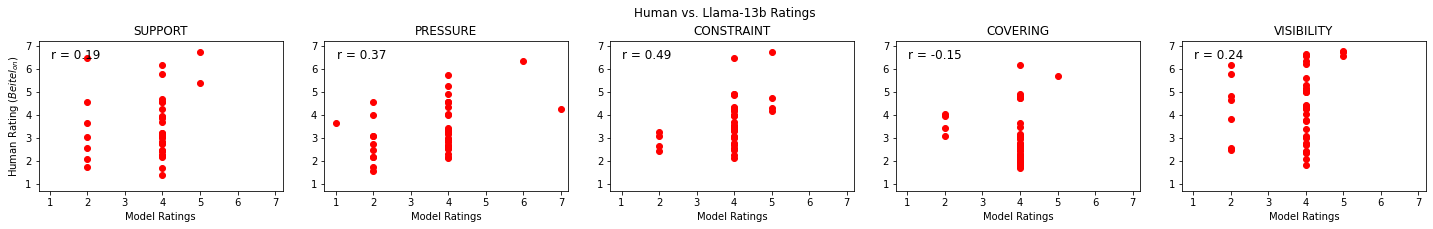

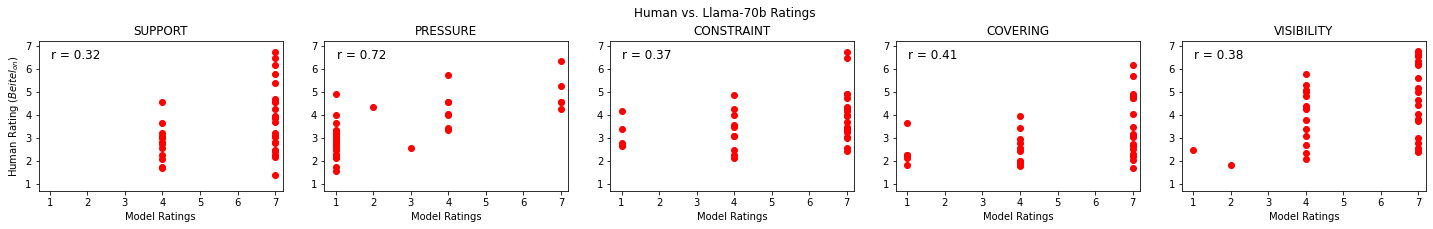

In [15]:
make_scatter_plots_beitel(model_result_dict_2=davinci002_exp2_dict, title="Human vs. davinci-002 Ratings", x_label="Model Ratings")
make_scatter_plots_beitel(model_result_dict_2=davinci003_exp2_dict, title="Human vs. davinci-003 Ratings", x_label="Model Ratings")
make_scatter_plots_beitel(model_result_dict_2=davinci003_exp2_dict_logprobs, title="Human vs. davinci-003 (logprobs averaged) Ratings", x_label="Model Ratings")
make_scatter_plots_beitel(model_result_dict_2=gpt4_exp2_dict, title="Human vs. GPT-4 Ratings", x_label="Model Ratings")
make_scatter_plots_beitel(model_result_dict_2=llama7b_exp2_df, title="Human vs. Llama-7b Ratings", x_label="Model Ratings")
make_scatter_plots_beitel(model_result_dict_2=llama13b_exp2_df, title="Human vs. Llama-13b Ratings", x_label="Model Ratings")
make_scatter_plots_beitel(model_result_dict_2=llama70b_exp2_df, title="Human vs. Llama-70b Ratings", x_label="Model Ratings")

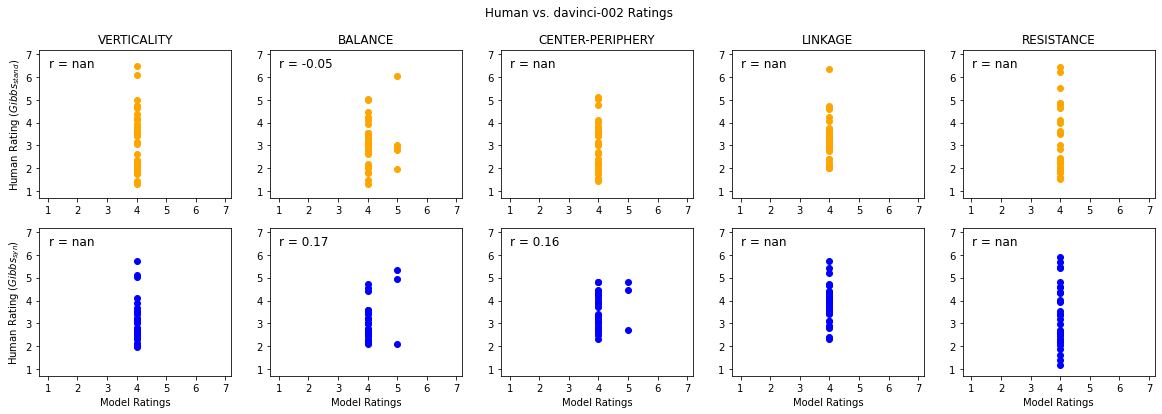

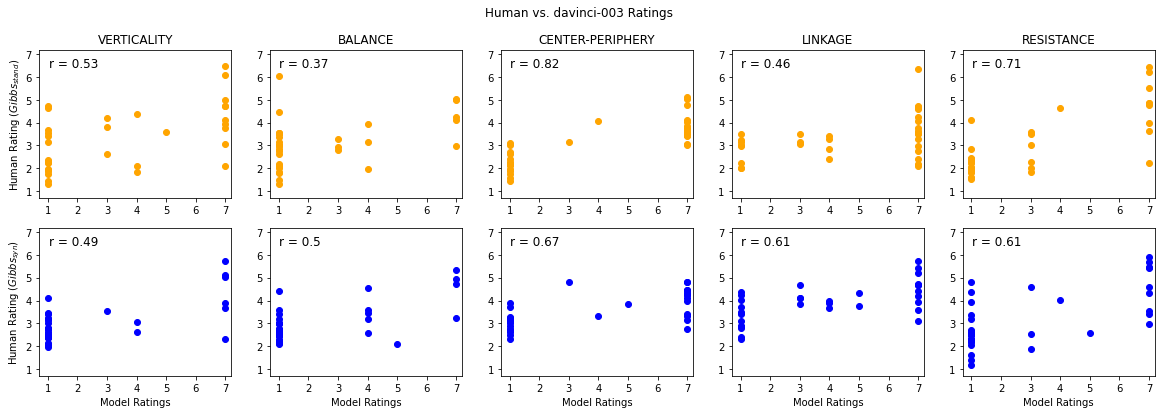

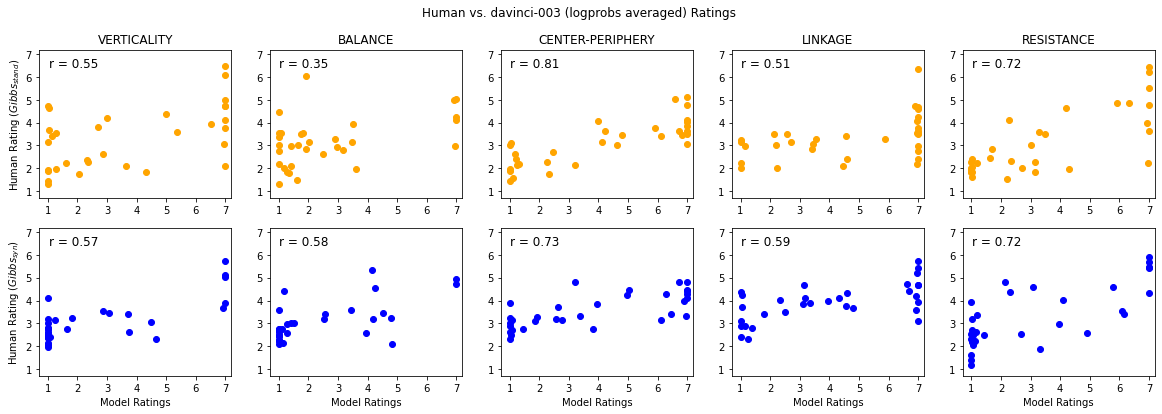

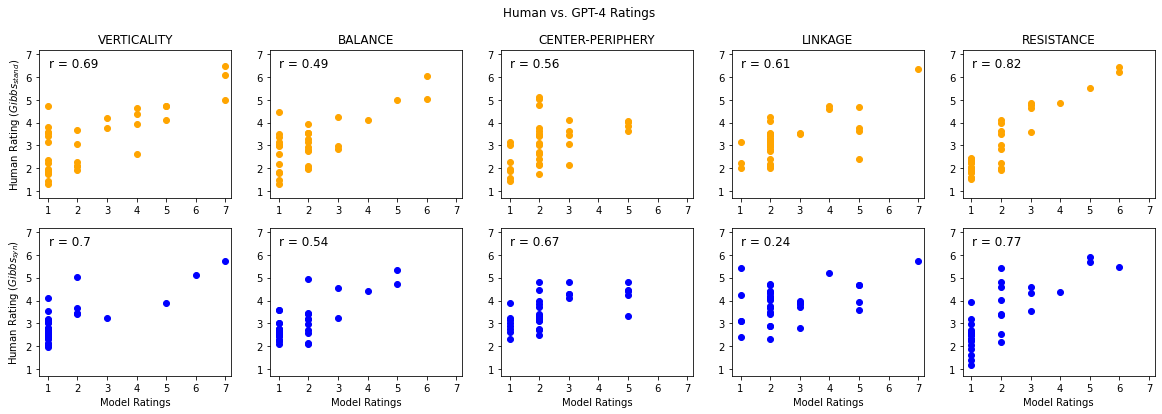

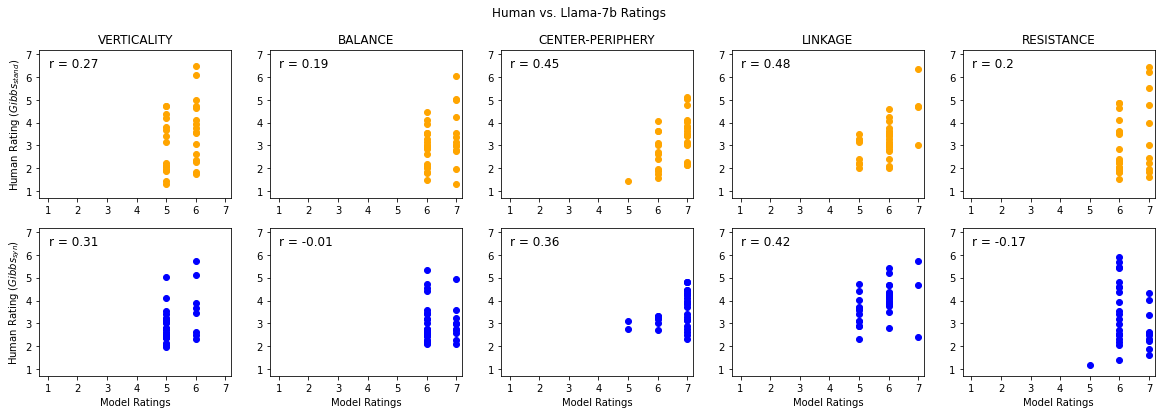

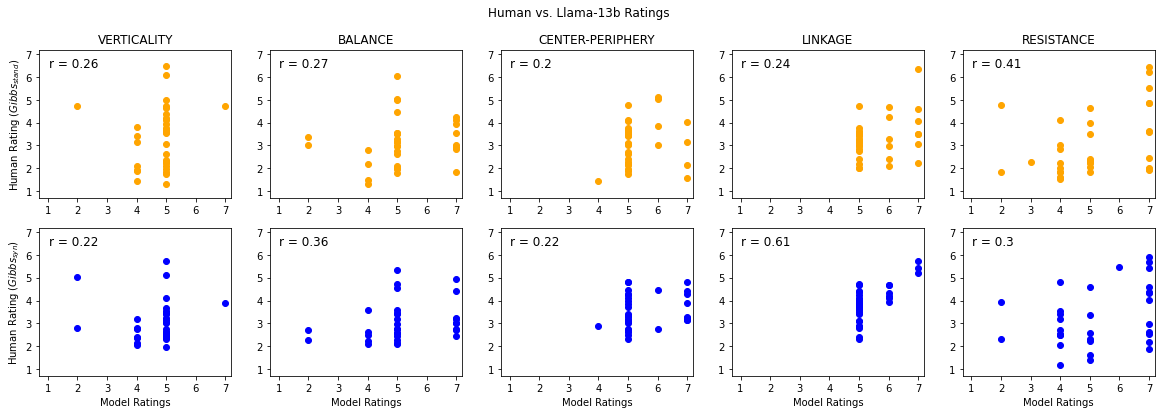

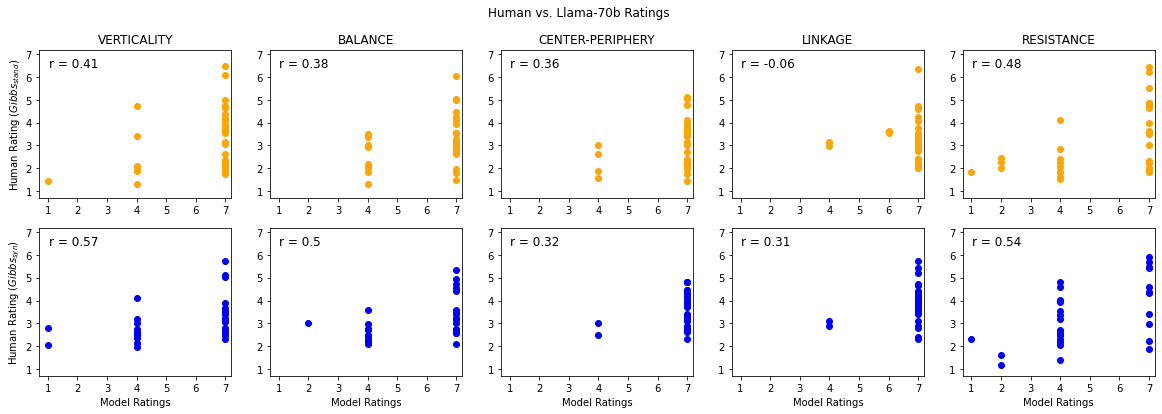

In [16]:
make_scatter_plots_gibbs(model_result_dict_3=davinci002_exp3_dict, model_result_dict_4=davinci002_exp4_dict, title="Human vs. davinci-002 Ratings", x_label="Model Ratings")
make_scatter_plots_gibbs(model_result_dict_3=davinci003_exp3_dict, model_result_dict_4=davinci003_exp4_dict, title="Human vs. davinci-003 Ratings", x_label="Model Ratings")
make_scatter_plots_gibbs(model_result_dict_3=davinci003_exp3_dict_logprobs, model_result_dict_4=davinci003_exp4_dict_logprobs, title="Human vs. davinci-003 (logprobs averaged) Ratings", x_label="Model Ratings")
make_scatter_plots_gibbs(model_result_dict_3=gpt4_exp3_dict, model_result_dict_4=gpt4_exp4_dict, title="Human vs. GPT-4 Ratings", x_label="Model Ratings")
make_scatter_plots_gibbs(model_result_dict_3=llama7b_exp3_df, model_result_dict_4=llama7b_exp4_df, title="Human vs. Llama-7b Ratings", x_label="Model Ratings")
make_scatter_plots_gibbs(model_result_dict_3=llama13b_exp3_df, model_result_dict_4=llama13b_exp4_df, title="Human vs. Llama-13b Ratings", x_label="Model Ratings")
make_scatter_plots_gibbs(model_result_dict_3=llama70b_exp3_df, model_result_dict_4=llama70b_exp4_df, title="Human vs. Llama-70b Ratings", x_label="Model Ratings")


In [17]:
# given model results, what are the examples where the difference to the human ratings is the biggest?
to_test = gpt4_exp3_dict
human_ratings = exp_3_df

difference_dict = {}
for key in DEFINITIONS:
    difference_dict[key] = []
    for i, val in enumerate(to_test[key]):
        #print(STIMULI_EXP3[i], val, exp_3_df[key][i], abs(val-exp_3_df[key][i]))
        stimulus = STIMULI_EXP3[i]
        difference_dict[key].append((stimulus, val, human_ratings[key][i], abs(val-human_ratings[key][i])))

for key in DEFINITIONS:
    print(key)
    # sort by difference, descending
    print(sorted(difference_dict[key], key=lambda x: x[3], reverse=True)) 

VERTICALITY
[('the barometer stands at 30 inches', 1, 4.71, 3.71), ('stand by your man', 1, 3.79, 2.79), ("to stand in someone else's shoes", 1, 3.58, 2.58), ('stand out in several sports', 1, 3.54, 2.54), ('the police told them to stand back', 1, 3.42, 2.42), ('get stood up for a date', 1, 3.17, 2.17), ('a standing ovation', 7, 5.0, 2.0), ('he stands committed', 2, 3.66, 1.6600000000000001), ('to stand the test of time', 1, 2.38, 1.38), ('we stand on 30 years of experience', 4, 2.63, 1.37), ("don't stand for such treatment", 1, 2.21, 1.21), ('united we stand', 3, 4.21, 1.21), ('to stand against great odds', 2, 3.08, 1.08), ('it stands to reason', 1, 1.96, 0.96), ('stand at attention', 7, 6.08, 0.9199999999999999), ('as the matter now stands', 1, 1.88, 0.8799999999999999), ('to stand firm', 5, 4.13, 0.8700000000000001), ('the part stands for the whole', 1, 1.83, 0.8300000000000001), ('to stand to profit', 1, 1.75, 0.75), ('stand in awe', 3, 3.75, 0.75), ('the house stands in the cleari